# Hypothyroidism
: deficient activity of the thyroid gland; also : a resultant bodily condition characterized by lowered metabolic rate and general loss of vigor

This dataset comes from UCI Machine Learning Repository.  It is intended as a practice set for machine learning.

My interest in this dataset stems from my personal experience with my own diagnosis of Hashimoto's Thyroiditis and the process I went through to finally discover my condition. 
The dataset is descriptive rather than inferential.  
In his paper, Induction of Decision Trees, J.R. Quinlan breaks down the assembly of data 

In clincial evalutation of Hashimoto's Thyroiditis detection typically begins with high blood levels of TSH (Thyroid Stimulating Hormone). Normal levels are now referenced in the range: 0.3-3.0 uIU/L (but some labs use the old reference range of 0.2-8.0 uIU/L).  Hashimoto's is usually diagnosed as mild beginning at 4.0 mIU/L.

After out-of-range TSH levels indicate the presence a thryoid condition the thyroid hormones T3 and T4 are then evaluated.  Normal range for T3 is roughly 3 to 7 pmol/L.  Normal range for free T4 is roughly 9 to 23 pmol/L.  There are very good arguments for implementing a tighter reference range that a number of clinics now use, but most doctors still diagnose thyroid conditions using the well established and long used standard reference range, so I will utlize the old ranges for this analysis.

In my analysis I will look at three conditions:<br>
Primary Hypothyoroid: hight TSH and low free T4        (>3.0 and <9 respectively)<br>
Secondary Hypothyroid: low TSH and low free T3 and T4. (<0.3 and <3 and <9 respectively)<br>
Hyperthyroid: low TSH and high T3 and T4.              (<0.3 and >7 and >23 respectively)<br>

References for thyroid hormone blood levels and diagnosis of hypothyroidism:<br>
https://www.thyroid.org/<br>
https://thyroidpharmacist.com/articles/what-to-do-if-your-tsh-is-normal-and-you-are-anything-but/<br>
https://www.webmd.com/women/what-is-tsh-test#1<br>
http://www.autoimmunemom.com/graves-disease-thyroid/thyroid-hormone-levels-t4-t3-t2-and-t1.html<br>
https://www.mayomedicallaboratories.com/test-catalog/Clinical+and+Interpretive/9263<br>
http://thyroidlovingcare.com/rethinking-normal-ranges<br>
https://www.endocrineweb.com/conditions/thyroid/thyroid-function-tests

Details in regards to units of measure and criteria used for assigning condition were not provided with the data set.  
Assumptions must be weeded out in order to determine the best criteria for evaluating the data.

First, since this set is intended for training a machine learning paradigm it can be assumed that the conditions 'hypothyroid' and 'negative' were assigned using traditional clinical methods utilizing well established reference ranges for blood levels of markers.  Some of the reference ranges reported in the literature linked above vary a bit in unts used and the numbers shift depending on which units are used.  Therefore for my initial explorations into the data I selected the numbers reported in the web sites above that most lined up and made the most sense within the value range for each category.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.axes as ax
%matplotlib inline

In [2]:
ht = pd.read_csv('hypothyroid data.csv', header=None)

Change column names

In [3]:
ht.columns=['hypothyroid','age','sex','on_thyroxine','query_on_thyroxine',
            'on_antithyroid_medication','thyroid_surgery','query_hypothyroid',
            'query_hyperthryoid','pregnant','sick','tumor','lithium','goiter',
            'TSH_measured','TSH','T3_measured','T3','TT4_measured','TT4',
            'T4U_measured','T4U','FTI_measured','FTI','TBG_measured','TBG']

In [4]:
#Replace '?' values with 0
ht = ht.replace(['?'], 0)

In [5]:
#convert numbers to ints and floats for accurate scatter and bar plots.
for index, age in enumerate(ht['age']):
    if age != 'NaN':
        ht['age'][index] = int(age)
for index, T3 in enumerate(ht['T3']):
    if T3 != 'NaN':
        ht['T3'][index] = float(T3)
for index, TSH in enumerate(ht['TSH']):
    if TSH != 'NaN':
        ht['TSH'][index] = float(TSH)
for index, TT4 in enumerate(ht['TT4']):
    if TT4 != 'NaN':
        ht['TT4'][index] = float(TT4)
for index, T4U in enumerate(ht['T4U']):
    if T4U != 'NaN':
        ht['T4U'][index] = float(T4U)
for index, FTI in enumerate(ht['FTI']):
    if FTI != 'NaN':
        ht['FTI'][index] = float(FTI)
for index, TBG in enumerate(ht['TBG']):
    if TBG != 'NaN':
        ht['TBG'][index] = float(TBG)

Set up universal variables for this dataset<br>
As there are no units listed anywhere in the folders for these datasets I selected the numbers reported in the web sites above that most lined up and made the most sense within the value range for each category.

In [6]:
lowTSH = 0.3
highTSH = 3.0
lowT4U = 0.7
highT4U = 1.9
lowFTI = 4
highFTI = 11
lowT3 = 3
highT3 = 7
lowTBG = 11
highTBG = 27

Change figure size to make numbers on axes readable

In [7]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=12
fig_size[1]=8
plt.rcParams["figure.figsize"] = fig_size

My attempts at a histogram failed. I could not figure out why the operation would get stuck or hung up unless it used a sorted list of strings.  So my next best solution was to create a bar graph with each unique value on the x-axis and a count of that value as it's height.

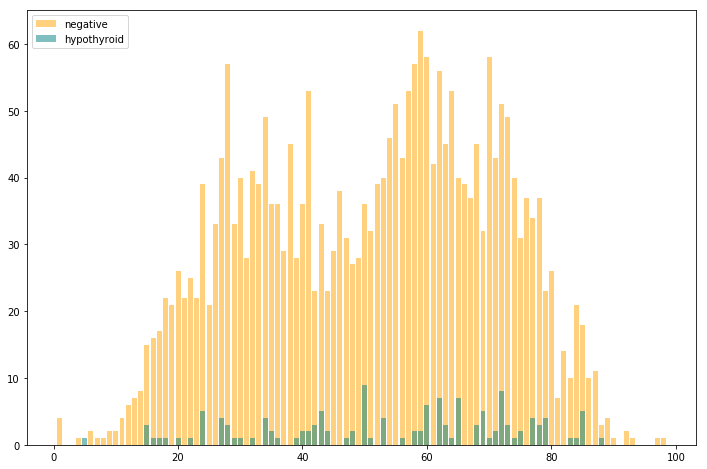

In [8]:
plt.bar(x=np.unique(ht['age'].loc[(ht['age']!=0)
                    &(ht['hypothyroid'].isin(['negative']))]),
                    height=ht['age'].loc[(ht['age']!=0)
                    &(ht['hypothyroid'].isin(['negative']))].value_counts(sort=False),
        color='orange', alpha=.5, label='negative')
plt.bar(x=np.unique(ht['age'].loc[(ht['age']!=0)
                    &ht['hypothyroid'].isin(['hypothyroid'])]),
                    height=ht['age'].loc[(ht['age']!=0)
                    &ht['hypothyroid'].isin(['hypothyroid'])].value_counts(sort=False), 
        color='teal',alpha=.5, label='hypothyroid')

plt.legend(loc='upper left')

The groups are not equally represented with a large n for 'negative' and a relatively small n for 'hypothyroid'

TSH (pituitary hormone) vs T3, T4, and TGB hormones (thyroid hormones)

Expected:
Individuals identified as "hypothyroid" should disply high levels of TSH and low T4U (unbound T4 or free T4) or FTI (Free T4 Index).  T3 levels may be low but not always and TGB levels should be normal or low in hypothyroid individuals.

From American Hypothyroid Association web page: "The free T4 and the free T4 index are both simple blood tests that measure how much unattached T4 is in the blood and available to get into cells."

N.B. x-axes converted to log scale to make values near the TSH cut-offs easier to see.

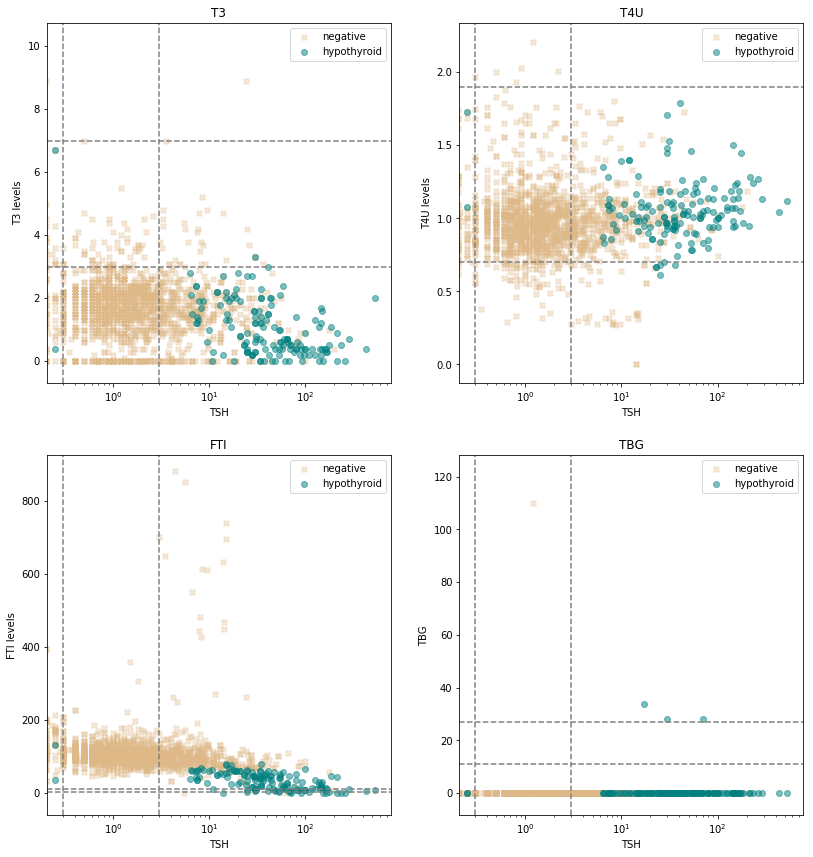

<Figure size 2160x2160 with 0 Axes>

In [9]:
x, axarr = plt.subplots(2, 2)
plt.figure(figsize=(30, 30))

axarr[0,0].scatter(ht['TSH'].loc[ht['hypothyroid'].isin(['negative'])],
                   ht['T3'].loc[ht['hypothyroid'].isin(['negative'])],
                   c='burlywood', alpha=.3, label='negative', marker='X')
axarr[0,0].scatter(ht['TSH'].loc[ht['hypothyroid'].isin(['hypothyroid'])], 
                   ht['T3'].loc[ht['hypothyroid'].isin(['hypothyroid'])],
                   c='teal', alpha=.5, label='hypothyroid')
axarr[0,0].axhline(y=lowT3, color='gray', linestyle='--')
axarr[0,0].axhline(y=highT3, color='gray', linestyle='--')
axarr[0,0].axvline(x=lowTSH, color='gray', linestyle='--')
axarr[0,0].axvline(x=highTSH, color='gray', linestyle='--')
axarr[0,0].set_xscale('log')
#axarr[0,0].set_yscale('log')
axarr[0,0].set_xlabel('TSH')
axarr[0,0].set_ylabel('T3 levels')
axarr[0,0].legend(loc='upper right',prop={'size': 10});
axarr[0,0].set_title('T3')

axarr[0,1].scatter(ht['TSH'].loc[ht['hypothyroid'].isin(['negative'])],
                   ht['T4U'].loc[ht['hypothyroid'].isin(['negative'])], 
                   c='burlywood', alpha=.3, label='negative', marker='X')
axarr[0,1].scatter(ht['TSH'].loc[ht['hypothyroid'].isin(['hypothyroid'])],
                   ht['T4U'].loc[ht['hypothyroid'].isin(['hypothyroid'])], 
                   c='teal', alpha=.5, label='hypothyroid')
axarr[0,1].axhline(y=lowT4U, color='gray', linestyle='--')
axarr[0,1].axhline(y=highT4U, color='gray', linestyle='--')
axarr[0,1].axvline(x=lowTSH, color='gray', linestyle='--')
axarr[0,1].axvline(x=highTSH, color='gray', linestyle='--')
axarr[0,1].set_xscale('log')
#axarr[0,1].set_yscale('log')
axarr[0,1].set_xlabel('TSH')
axarr[0,1].set_ylabel('T4U levels')
axarr[0,1].legend(loc='upper right',prop={'size': 10});
axarr[0,1].set_title('T4U')

axarr[1,0].scatter(ht['TSH'].loc[ht['hypothyroid'].isin(['negative'])],
                   ht['FTI'].loc[ht['hypothyroid'].isin(['negative'])],
                   c='burlywood', alpha=.3, label='negative', marker='X')
axarr[1,0].scatter(ht['TSH'].loc[ht['hypothyroid'].isin(['hypothyroid'])],
                   ht['FTI'].loc[ht['hypothyroid'].isin(['hypothyroid'])],
                   c='teal', alpha=.5, label='hypothyroid')
axarr[1,0].axhline(y=lowFTI, color='gray', linestyle='--')
axarr[1,0].axhline(y=highFTI, color='gray', linestyle='--')
axarr[1,0].axvline(x=lowTSH, color='gray', linestyle='--')
axarr[1,0].axvline(x=highTSH, color='gray', linestyle='--')
axarr[1,0].set_xscale('log')
#axarr[1,0].set_yscale('log')
axarr[1,0].set_xlabel('TSH')
axarr[1,0].set_ylabel('FTI levels')
axarr[1,0].legend(loc='upper right',prop={'size': 10});
axarr[1,0].set_title('FTI')

axarr[1,1].scatter(ht['TSH'].loc[ht['hypothyroid'].isin(['negative'])],
                   ht['TBG'].loc[ht['hypothyroid'].isin(['negative'])],
                   c='burlywood', alpha=.3, label='negative', marker='X')
axarr[1,1].scatter(ht['TSH'].loc[ht['hypothyroid'].isin(['hypothyroid'])],
                   ht['TBG'].loc[ht['hypothyroid'].isin(['hypothyroid'])],
                   c='teal', alpha=.5, label='hypothyroid')
axarr[1,1].axhline(y=lowTBG, color='gray', linestyle='--')
axarr[1,1].axhline(y=highTBG, color='gray', linestyle='--')
axarr[1,1].axvline(x=lowTSH, color='gray', linestyle='--')
axarr[1,1].axvline(x=highTSH, color='gray', linestyle='--')
axarr[1,1].set_xscale('log')
#axarr[1,1].set_yscale('log')
axarr[1,1].set_xlabel('TSH')
axarr[1,1].set_ylabel('TBG')
axarr[1,1].legend(loc='upper right',prop={'size': 10});
axarr[1,1].set_title('TBG')

x.subplots_adjust(top=1.5, right=1)

plt.show()

Based on my reading and research T4U and FTI levels should be lower than the normal range in hypothyroid patients, but according to the range that I have currently chosen for the values provided in the data frame, the T4 levels are either in range or above range.  I can think of two reasons for this - one, of course, is that my ranges are incorrect; but the other is that there is another group that I have not yet taken into account - some patients are treated with thyroxine, a T4 hormonal supplement.  If these patients have been on the supplement long enough to bring levels back into range then they would appear normal though they are technically 'hypothyroid'.

I will recreate the same exact graphs, but with the two groups now divided into treated and untreated categories.
Expected:<br>
Treated group is within range and intreated group is below range.

Three levels of information:<br>
1. x-axis by age
2. y-axis by hormone level
3. colored by treatment group

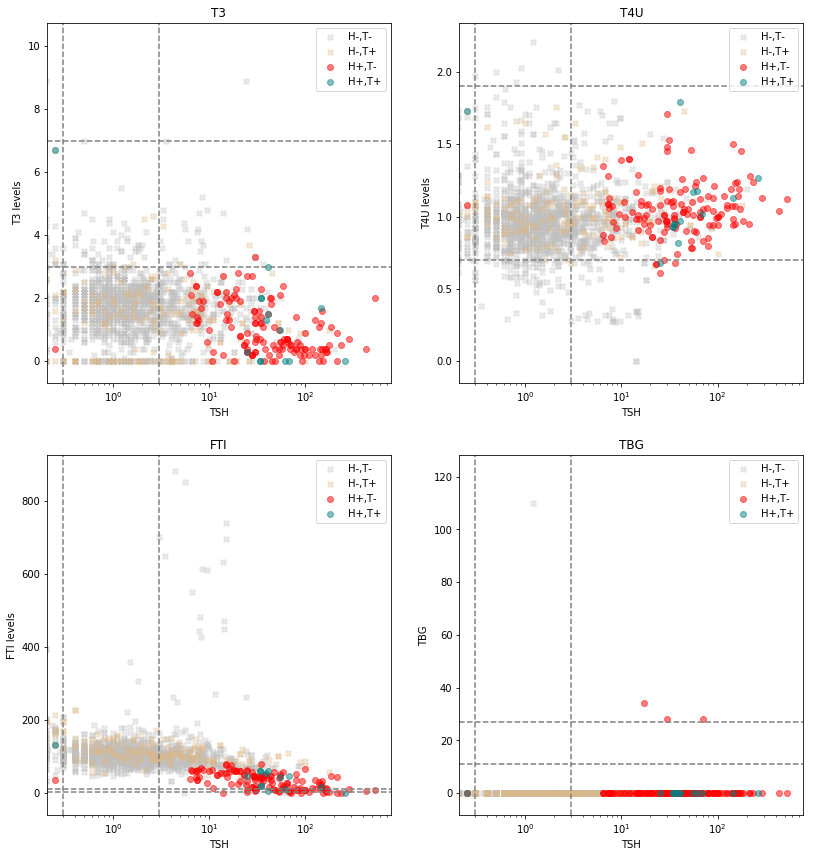

<Figure size 1440x1440 with 0 Axes>

In [10]:
x, axarr = plt.subplots(2, 2)
plt.figure(figsize=(20, 20))
label1 = 'H-,T-'
label2 = 'H-,T+'
label3 = 'H+,T-'
label4 = 'H+,T+'

axarr[0,0].scatter(ht['TSH'].loc[(ht['hypothyroid'].isin(['negative']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   ht['T3'].loc[(ht['hypothyroid'].isin(['negative']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   c='silver', alpha=.3, label=label1, marker='X')
axarr[0,0].scatter(ht['TSH'].loc[(ht['hypothyroid'].isin(['negative']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   ht['T3'].loc[(ht['hypothyroid'].isin(['negative']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   c='burlywood', alpha=.3, label=label2, marker='X')
axarr[0,0].scatter(ht['TSH'].loc[(ht['hypothyroid'].isin(['hypothyroid']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   ht['T3'].loc[(ht['hypothyroid'].isin(['hypothyroid']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   c='red', alpha=.5, label=label3)
axarr[0,0].scatter(ht['TSH'].loc[(ht['hypothyroid'].isin(['hypothyroid']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   ht['T3'].loc[(ht['hypothyroid'].isin(['hypothyroid']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   c='teal', alpha=.5, label=label4)
axarr[0,0].axhline(y=lowT3, color='gray', linestyle='--')
axarr[0,0].axhline(y=highT3, color='gray', linestyle='--')
axarr[0,0].axvline(x=lowTSH, color='gray', linestyle='--')
axarr[0,0].axvline(x=highTSH, color='gray', linestyle='--')
axarr[0,0].set_xscale('log')
#axarr[0,0].set_yscale('log')
axarr[0,0].set_xlabel('TSH')
axarr[0,0].set_ylabel('T3 levels')
axarr[0,0].legend(loc='upper right',prop={'size': 10});
axarr[0,0].set_title('T3')

axarr[0,1].scatter(ht['TSH'].loc[(ht['hypothyroid'].isin(['negative']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   ht['T4U'].loc[(ht['hypothyroid'].isin(['negative']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   c='silver', alpha=.3, label=label1, marker='X')
axarr[0,1].scatter(ht['TSH'].loc[(ht['hypothyroid'].isin(['negative']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   ht['T4U'].loc[(ht['hypothyroid'].isin(['negative']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   c='burlywood', alpha=.3, label=label2, marker='X')
axarr[0,1].scatter(ht['TSH'].loc[(ht['hypothyroid'].isin(['hypothyroid']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   ht['T4U'].loc[(ht['hypothyroid'].isin(['hypothyroid']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   c='red', alpha=.5, label=label3)
axarr[0,1].scatter(ht['TSH'].loc[(ht['hypothyroid'].isin(['hypothyroid']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   ht['T4U'].loc[(ht['hypothyroid'].isin(['hypothyroid']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   c='teal', alpha=.5, label=label4)
axarr[0,1].axhline(y=lowT4U, color='gray', linestyle='--')
axarr[0,1].axhline(y=highT4U, color='gray', linestyle='--')
axarr[0,1].axvline(x=lowTSH, color='gray', linestyle='--')
axarr[0,1].axvline(x=highTSH, color='gray', linestyle='--')
axarr[0,1].set_xscale('log')
#axarr[0,1].set_yscale('log')
axarr[0,1].set_xlabel('TSH')
axarr[0,1].set_ylabel('T4U levels')
axarr[0,1].legend(loc='upper right',prop={'size': 10});
axarr[0,1].set_title('T4U')

axarr[1,0].scatter(ht['TSH'].loc[(ht['hypothyroid'].isin(['negative']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   ht['FTI'].loc[(ht['hypothyroid'].isin(['negative']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   c='silver', alpha=.3, label=label1, marker='X')
axarr[1,0].scatter(ht['TSH'].loc[(ht['hypothyroid'].isin(['negative']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   ht['FTI'].loc[(ht['hypothyroid'].isin(['negative']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   c='burlywood', alpha=.3, label=label2, marker='X')
axarr[1,0].scatter(ht['TSH'].loc[(ht['hypothyroid'].isin(['hypothyroid']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   ht['FTI'].loc[(ht['hypothyroid'].isin(['hypothyroid']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   c='red', alpha=.5, label=label3)
axarr[1,0].scatter(ht['TSH'].loc[(ht['hypothyroid'].isin(['hypothyroid']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   ht['FTI'].loc[(ht['hypothyroid'].isin(['hypothyroid']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   c='teal', alpha=.5, label=label4)
axarr[1,0].axhline(y=lowFTI, color='gray', linestyle='--')
axarr[1,0].axhline(y=highFTI, color='gray', linestyle='--')
axarr[1,0].axvline(x=lowTSH, color='gray', linestyle='--')
axarr[1,0].axvline(x=highTSH, color='gray', linestyle='--')
axarr[1,0].set_xscale('log')
#axarr[1,0].set_yscale('log')
axarr[1,0].set_xlabel('TSH')
axarr[1,0].set_ylabel('FTI levels')
axarr[1,0].legend(loc='upper right',prop={'size': 10});
axarr[1,0].set_title('FTI')

axarr[1,1].scatter(ht['TSH'].loc[(ht['hypothyroid'].isin(['negative']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   ht['TBG'].loc[(ht['hypothyroid'].isin(['negative']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   c='silver', alpha=.3, label=label1, marker='X')
axarr[1,1].scatter(ht['TSH'].loc[(ht['hypothyroid'].isin(['negative']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   ht['TBG'].loc[(ht['hypothyroid'].isin(['negative']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   c='burlywood', alpha=.3, label=label2, marker='X')
axarr[1,1].scatter(ht['TSH'].loc[(ht['hypothyroid'].isin(['hypothyroid']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   ht['TBG'].loc[(ht['hypothyroid'].isin(['hypothyroid']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   c='red', alpha=.5, label=label3)
axarr[1,1].scatter(ht['TSH'].loc[(ht['hypothyroid'].isin(['hypothyroid']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   ht['TBG'].loc[(ht['hypothyroid'].isin(['hypothyroid']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   c='teal', alpha=.5, label=label4)
axarr[1,1].axhline(y=lowTBG, color='gray', linestyle='--')
axarr[1,1].axhline(y=highTBG, color='gray', linestyle='--')
axarr[1,1].axvline(x=lowTSH, color='gray', linestyle='--')
axarr[1,1].axvline(x=highTSH, color='gray', linestyle='--')
axarr[1,1].set_xscale('log')
#axarr[1,1].set_yscale('log')
axarr[1,1].set_xlabel('TSH')
axarr[1,1].set_ylabel('TBG')
axarr[1,1].legend(loc='upper right',prop={'size': 10});
axarr[1,1].set_title('TBG')

x.subplots_adjust(top=1.5, right=1)

plt.show()

Treated and Untreated data are highly mixed and there is no clear distinction between the two groups.
Looking at the data again I see there are clear clusters of hypothryoid vs normal patients.  To find a better cutoff for my ranges I will use the upper and lower quartile values calculated off of the normal data in each category.

### New Cutoffs

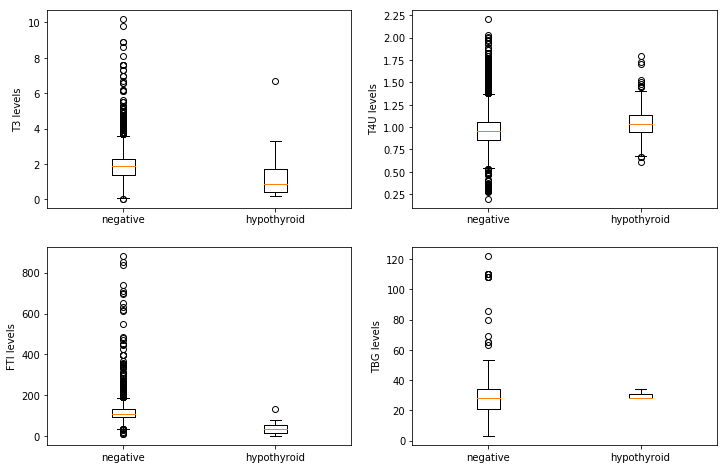

<Figure size 1440x1440 with 0 Axes>

In [11]:
x, axarr = plt.subplots(2, 2)
plt.figure(figsize=(20, 20))

axarr[0,0].boxplot([ht['T3'].loc[(ht['T3']!=0)
                                &(ht['hypothyroid'].isin(['negative']))],
                    ht['T3'].loc[(ht['T3']!=0)
                                &(ht['hypothyroid'].isin(['hypothyroid']))]],
                  positions=[1,2], labels=['negative', 'hypothyroid'])
axarr[0,0].set_ylabel('T3 levels')

axarr[0,1].boxplot([ht['T4U'].loc[(ht['T4U']!=0)
                                &(ht['hypothyroid'].isin(['negative']))],
                    ht['T4U'].loc[(ht['T4U']!=0)
                                &(ht['hypothyroid'].isin(['hypothyroid']))]],
                  positions = [1,2], labels = ['negative', 'hypothyroid'])
axarr[0,1].set_ylabel('T4U levels')

axarr[1,0].boxplot([ht['FTI'].loc[(ht['FTI']!=0)
                                &(ht['hypothyroid'].isin(['negative']))],
                    ht['FTI'].loc[(ht['FTI']!=0)
                                &(ht['hypothyroid'].isin(['hypothyroid']))]],
                  positions = [1,2], labels = ['negative', 'hypothyroid'])
axarr[1,0].set_ylabel('FTI levels')

axarr[1,1].boxplot([ht['TBG'].loc[(ht['TBG']!=0)
                                &(ht['hypothyroid'].isin(['negative']))],
                    ht['TBG'].loc[(ht['TBG']!=0)
                                &(ht['hypothyroid'].isin(['hypothyroid']))]],
                  positions = [1,2], labels = ['negative', 'hypothyroid'])
axarr[1,1].set_ylabel('TBG levels')

plt.show()

A quick visualization of the boxplots shows that for for FTI, using the upper and lower quartile ranges would fit the disease profile better.

In [12]:
sortedPoints = sorted(ht['T3'].loc[(ht['T3']!=0)
                            &(ht['hypothyroid'].isin(['negative']))])
mid = len(sortedPoints) / 2

if (len(sortedPoints) % 2 == 0):
   # even
   lowerQ_T3 = np.median(sortedPoints[:mid])
   upperQ_T3 = np.median(sortedPoints[mid:])
else:
   # odd
   lowerQ_T3 = np.median(sortedPoints[:int(mid)])  # same as even
   upperQ_T3 = np.median(sortedPoints[int(mid+1):])

In [13]:
#method for changing limits values to quartiles

def negative_thyroid_quartiles(column_name, quartile):
    try:
        sortedPoints = sorted(ht[column_name].loc[(ht[column_name]!=0)
                                &(ht['hypothyroid'].isin(['negative']))])
        mid = len(sortedPoints) / 2

        if (len(sortedPoints) % 2 == 0):
            # even
            if quartile == 'lower':
                return np.median(sortedPoints[:int(mid)])
            if quartile == 'upper':
                return np.median(sortedPoints[int(mid):])
        else:
           # odd
            if quartile == 'lower':
                return np.median(sortedPoints[:int(mid)])  # same as even
            if quartile == 'upper':
                return np.median(sortedPoints[int(mid+1):])
    except ValueError:
        print('There is an error in your input')

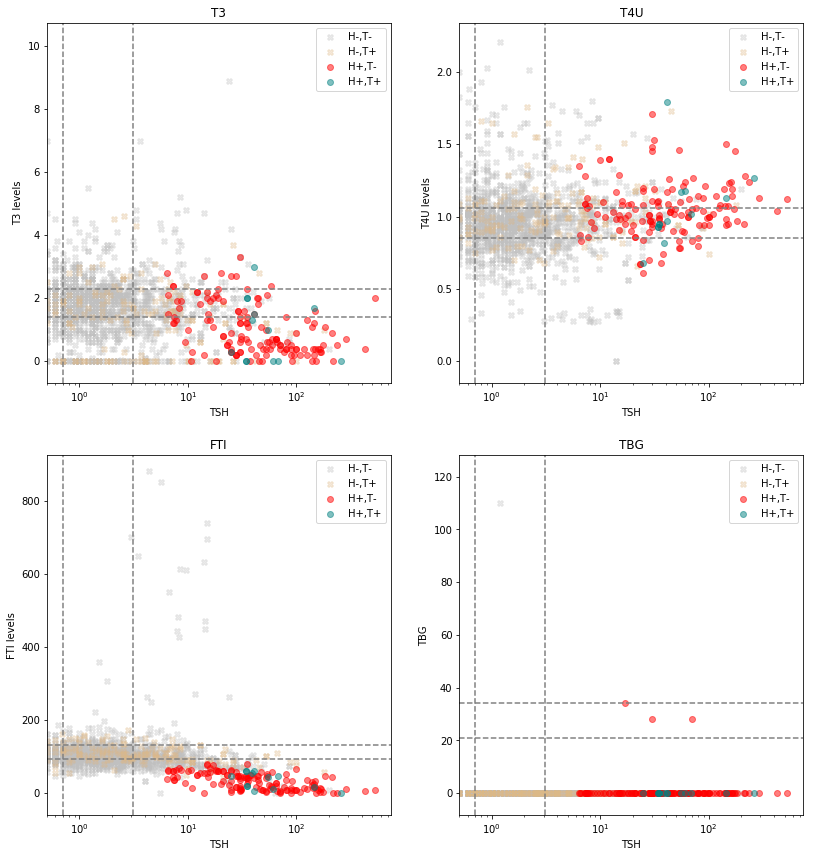

<Figure size 1440x1440 with 0 Axes>

In [14]:
#Change limits to new limits using quartiles
lowTSH = negative_thyroid_quartiles('TSH', 'lower')
highTSH = negative_thyroid_quartiles('TSH', 'upper')
lowT4U = negative_thyroid_quartiles('T4U', 'lower')
highT4U = negative_thyroid_quartiles('T4U', 'upper')
lowFTI = negative_thyroid_quartiles('FTI', 'lower')
highFTI = negative_thyroid_quartiles('FTI', 'upper')
lowT3 = negative_thyroid_quartiles('T3', 'lower')
highT3 = negative_thyroid_quartiles('T3', 'upper')
lowTBG = negative_thyroid_quartiles('TBG', 'lower')
highTBG = negative_thyroid_quartiles('TBG', 'upper')

x, axarr = plt.subplots(2, 2)
plt.figure(figsize=(20, 20))
label1 = 'H-,T-'
label2 = 'H-,T+'
label3 = 'H+,T-'
label4 = 'H+,T+'

axarr[0,0].scatter(ht['TSH'].loc[(ht['hypothyroid'].isin(['negative']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   ht['T3'].loc[(ht['hypothyroid'].isin(['negative']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   c='silver', alpha=.3, label=label1, marker='X')
axarr[0,0].scatter(ht['TSH'].loc[(ht['hypothyroid'].isin(['negative']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   ht['T3'].loc[(ht['hypothyroid'].isin(['negative']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   c='burlywood', alpha=.3, label=label2, marker='X')
axarr[0,0].scatter(ht['TSH'].loc[(ht['hypothyroid'].isin(['hypothyroid']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   ht['T3'].loc[(ht['hypothyroid'].isin(['hypothyroid']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   c='red', alpha=.5, label=label3)
axarr[0,0].scatter(ht['TSH'].loc[(ht['hypothyroid'].isin(['hypothyroid']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   ht['T3'].loc[(ht['hypothyroid'].isin(['hypothyroid']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   c='teal', alpha=.5, label=label4)
axarr[0,0].axhline(y=lowT3, color='gray', linestyle='--')
axarr[0,0].axhline(y=highT3, color='gray', linestyle='--')
axarr[0,0].axvline(x=lowTSH, color='gray', linestyle='--')
axarr[0,0].axvline(x=highTSH, color='gray', linestyle='--')
axarr[0,0].set_xscale('log')
#axarr[0,0].set_yscale('log')
axarr[0,0].set_xlabel('TSH')
axarr[0,0].set_ylabel('T3 levels')
axarr[0,0].legend(loc='upper right',prop={'size': 10});
axarr[0,0].set_title('T3')

axarr[0,1].scatter(ht['TSH'].loc[(ht['hypothyroid'].isin(['negative']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   ht['T4U'].loc[(ht['hypothyroid'].isin(['negative']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   c='silver', alpha=.3, label=label1, marker='X')
axarr[0,1].scatter(ht['TSH'].loc[(ht['hypothyroid'].isin(['negative']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   ht['T4U'].loc[(ht['hypothyroid'].isin(['negative']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   c='burlywood', alpha=.3, label=label2, marker='X')
axarr[0,1].scatter(ht['TSH'].loc[(ht['hypothyroid'].isin(['hypothyroid']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   ht['T4U'].loc[(ht['hypothyroid'].isin(['hypothyroid']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   c='red', alpha=.5, label=label3)
axarr[0,1].scatter(ht['TSH'].loc[(ht['hypothyroid'].isin(['hypothyroid']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   ht['T4U'].loc[(ht['hypothyroid'].isin(['hypothyroid']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   c='teal', alpha=.5, label=label4)
axarr[0,1].axhline(y=lowT4U, color='gray', linestyle='--')
axarr[0,1].axhline(y=highT4U, color='gray', linestyle='--')
axarr[0,1].axvline(x=lowTSH, color='gray', linestyle='--')
axarr[0,1].axvline(x=highTSH, color='gray', linestyle='--')
axarr[0,1].set_xscale('log')
#axarr[0,1].set_yscale('log')
axarr[0,1].set_xlabel('TSH')
axarr[0,1].set_ylabel('T4U levels')
axarr[0,1].legend(loc='upper right',prop={'size': 10});
axarr[0,1].set_title('T4U')

axarr[1,0].scatter(ht['TSH'].loc[(ht['hypothyroid'].isin(['negative']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   ht['FTI'].loc[(ht['hypothyroid'].isin(['negative']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   c='silver', alpha=.3, label=label1, marker='X')
axarr[1,0].scatter(ht['TSH'].loc[(ht['hypothyroid'].isin(['negative']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   ht['FTI'].loc[(ht['hypothyroid'].isin(['negative']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   c='burlywood', alpha=.3, label=label2, marker='X')
axarr[1,0].scatter(ht['TSH'].loc[(ht['hypothyroid'].isin(['hypothyroid']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   ht['FTI'].loc[(ht['hypothyroid'].isin(['hypothyroid']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   c='red', alpha=.5, label=label3)
axarr[1,0].scatter(ht['TSH'].loc[(ht['hypothyroid'].isin(['hypothyroid']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   ht['FTI'].loc[(ht['hypothyroid'].isin(['hypothyroid']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   c='teal', alpha=.5, label=label4)
axarr[1,0].axhline(y=lowFTI, color='gray', linestyle='--')
axarr[1,0].axhline(y=highFTI, color='gray', linestyle='--')
axarr[1,0].axvline(x=lowTSH, color='gray', linestyle='--')
axarr[1,0].axvline(x=highTSH, color='gray', linestyle='--')
axarr[1,0].set_xscale('log')
#axarr[1,0].set_yscale('log')
axarr[1,0].set_xlabel('TSH')
axarr[1,0].set_ylabel('FTI levels')
axarr[1,0].legend(loc='upper right',prop={'size': 10});
axarr[1,0].set_title('FTI')

axarr[1,1].scatter(ht['TSH'].loc[(ht['hypothyroid'].isin(['negative']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   ht['TBG'].loc[(ht['hypothyroid'].isin(['negative']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   c='silver', alpha=.3, label=label1, marker='X')
axarr[1,1].scatter(ht['TSH'].loc[(ht['hypothyroid'].isin(['negative']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   ht['TBG'].loc[(ht['hypothyroid'].isin(['negative']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   c='burlywood', alpha=.3, label=label2, marker='X')
axarr[1,1].scatter(ht['TSH'].loc[(ht['hypothyroid'].isin(['hypothyroid']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   ht['TBG'].loc[(ht['hypothyroid'].isin(['hypothyroid']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   c='red', alpha=.5, label=label3)
axarr[1,1].scatter(ht['TSH'].loc[(ht['hypothyroid'].isin(['hypothyroid']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   ht['TBG'].loc[(ht['hypothyroid'].isin(['hypothyroid']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   c='teal', alpha=.5, label=label4)
axarr[1,1].axhline(y=lowTBG, color='gray', linestyle='--')
axarr[1,1].axhline(y=highTBG, color='gray', linestyle='--')
axarr[1,1].axvline(x=lowTSH, color='gray', linestyle='--')
axarr[1,1].axvline(x=highTSH, color='gray', linestyle='--')
axarr[1,1].set_xscale('log')
#axarr[1,1].set_yscale('log')
axarr[1,1].set_xlabel('TSH')
axarr[1,1].set_ylabel('TBG')
axarr[1,1].legend(loc='upper right',prop={'size': 10});
axarr[1,1].set_title('TBG')

x.subplots_adjust(top=1.5, right=1)

plt.show()

In [15]:
print('lower and upper Quartiles\tValues selected from the literature\n'
      'low TSH: ', '\t', lowTSH, '\t\t0.3\n'
      'high TSH: ', '\t', highTSH, '\t\t3.0\n'
      'low T3: ', '\t', lowT3, '\t\t3.0\n'
      'high T3: ', '\t', highT3, '\t\t7.0\n'
      'low T4U: ', '\t', lowT4U, '\t\t0.7\n'
      'high T4U: ', '\t', highT4U, '\t\t1.9\n'
      'low FTI: ', '\t', lowFTI, '\t\t4.0\n'
      'high FTI: ', '\t', highFTI, '\t\t11.0\n'
      'low TBG: ', '\t', lowTBG, '\t\t11\n'
      'high TBG: ', '\t', highTBG, '\t\t27')

lower and upper Quartiles	Values selected from the literature
low TSH:  	 0.7 		0.3
high TSH:  	 3.1 		3.0
low T3:  	 1.4 		3.0
high T3:  	 2.3 		7.0
low T4U:  	 0.85 		0.7
high T4U:  	 1.06 		1.9
low FTI:  	 93.0 		4.0
high FTI:  	 131.0 		11.0
low TBG:  	 21.0 		11
high TBG:  	 34.0 		27


Most of the quartile values are similar enough to the reported clinical reference ranges except for FTI.  These values are over 10-fold greater than what I found online.  As I am uncertain of units (even some of the online ranges neglected to report units) I cannot say where this discrepancy comes from.

Let's look at some differences in levels between genders:

In [16]:
#method for calculating errors for bar graph
def ht_error_calc(column, ht_condition, sex):
    
    try:
        return (ht[column].loc[(ht[column]!=0)
                 &(ht['hypothyroid'].isin([ht_condition]))
                 &(ht['sex'].isin([sex]))
                ].std())/((ht[column].loc[(ht[column]!=0)
                 &(ht['hypothyroid'].isin([ht_condition]))
                 &(ht['sex'].isin([sex]))
                ].count())**.5)
    except ValueError:
        print('input error')

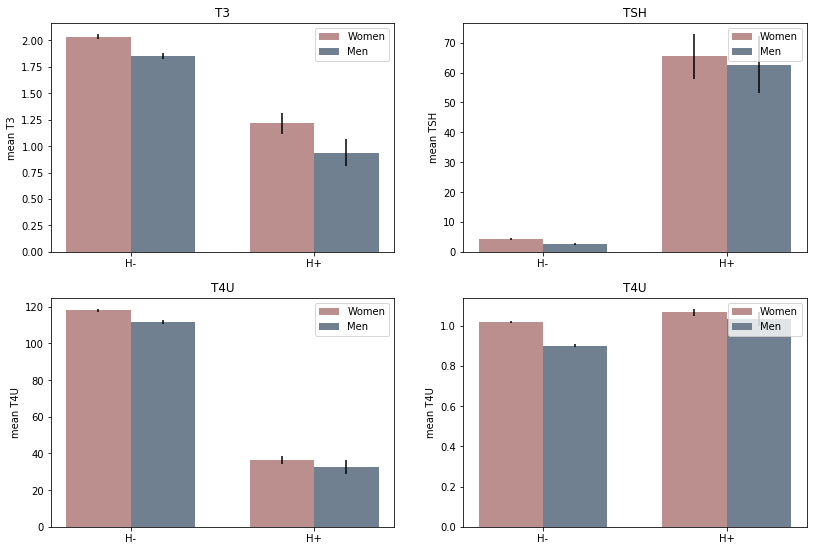

<Figure size 1440x1440 with 0 Axes>

In [17]:
x, axarr = plt.subplots(2, 2)
plt.figure(figsize=(20, 20))
ind = np.arange(2)
width = 0.35

fColor = 'rosybrown'
mColor = 'slategrey'

axarr[0,0].bar(ind, np.array([
    ht['T3'].loc[(ht['T3']!=0)
                 &(ht['hypothyroid'].isin(['negative']))
                 &(ht['sex'].isin(['F']))
                ].mean(),
    ht['T3'].loc[(ht['T3']!=0)
                 &(ht['hypothyroid'].isin(['hypothyroid']))
                 &(ht['sex'].isin(['F']))
                ].mean()
])
    , width, color=fColor, 
               yerr=(ht_error_calc('T3', 'negative', 'F'), ht_error_calc('T3', 'hypothyroid', 'F'))
              )
axarr[0,0].bar(ind+width, np.array([
    ht['T3'].loc[(ht['T3']!=0)
                 &(ht['hypothyroid'].isin(['negative']))
                 &(ht['sex'].isin(['M']))
                ].mean(),
    ht['T3'].loc[(ht['T3']!=0)
                 &(ht['hypothyroid'].isin(['hypothyroid']))
                 &(ht['sex'].isin(['M']))
                ].mean()
])
    , width, color=mColor, 
              yerr=(ht_error_calc('T3', 'negative', 'M'), ht_error_calc('T3', 'hypothyroid', 'M'))
              )
axarr[0,0].set_title('T3')
axarr[0,0].set_ylabel('mean T3')
axarr[0,0].set_xticks(ind + width / 2)
axarr[0,0].set_xticklabels(('H-','H+'))
axarr[0,0].legend(('Women', 'Men'))

axarr[0,1].bar(ind, np.array([
    ht['TSH'].loc[(ht['TSH']!=0)
                  &(ht['hypothyroid'].isin(['negative']))
                  &(ht['sex'].isin(['F']))
                 ].mean(),
    ht['TSH'].loc[(ht['TSH']!=0)
                  &(ht['hypothyroid'].isin(['hypothyroid']))
                  &(ht['sex'].isin(['F']))
                 ].mean()
])
    , width, color=fColor, 
               yerr=(ht_error_calc('TSH', 'negative', 'F'), ht_error_calc('TSH', 'hypothyroid', 'F'))
              )
axarr[0,1].bar(ind+width, np.array([
    ht['TSH'].loc[(ht['TSH']!=0)
                  &(ht['hypothyroid'].isin(['negative']))
                  &(ht['sex'].isin(['M']))
                 ].mean(),
    ht['TSH'].loc[(ht['TSH']!=0)
                  &(ht['hypothyroid'].isin(['hypothyroid']))
                  &(ht['sex'].isin(['M']))
                 ].mean()
])
    , width, color=mColor, 
               yerr=(ht_error_calc('TSH', 'negative', 'M'), ht_error_calc('TSH', 'hypothyroid', 'M'))
              )
axarr[0,1].set_title('TSH')
axarr[0,1].set_ylabel('mean TSH')
axarr[0,1].set_xticks(ind + width / 2)
axarr[0,1].set_xticklabels(('H-','H+'))
axarr[0,1].legend(('Women', 'Men'))

axarr[1,0].bar(ind,np.array([
    ht['FTI'].loc[(ht['FTI']!=0)
                  &(ht['hypothyroid'].isin(['negative']))
                  &(ht['sex'].isin(['F']))
                 ].mean(),
    ht['FTI'].loc[(ht['FTI']!=0)
                  &(ht['hypothyroid'].isin(['hypothyroid']))
                  &(ht['sex'].isin(['F']))
                 ].mean()
])
    , width, color=fColor, 
              yerr=(ht_error_calc('FTI', 'negative', 'F'), ht_error_calc('FTI', 'hypothyroid', 'F'))
              )
axarr[1,0].bar(ind + width,np.array([
    ht['FTI'].loc[(ht['FTI']!=0)
                  &(ht['hypothyroid'].isin(['negative']))
                  &(ht['sex'].isin(['M']))
                 ].mean(),
    ht['FTI'].loc[(ht['FTI']!=0)
                  &(ht['hypothyroid'].isin(['hypothyroid']))
                  &(ht['sex'].isin(['M']))
                 ].mean()
])
    , width, color=mColor, 
              yerr=(ht_error_calc('FTI', 'negative', 'M'), ht_error_calc('FTI', 'hypothyroid', 'M'))
              )
axarr[1,0].set_title('T4U')
axarr[1,0].set_ylabel('mean T4U')
axarr[1,0].set_xticks(ind + width / 2)
axarr[1,0].set_xticklabels(('H-','H+'))
axarr[1,0].legend(('Women', 'Men'))

axarr[1,1].bar(ind, np.array([
    ht['T4U'].loc[(ht['T4U']!=0)
                  &(ht['hypothyroid'].isin(['negative']))
                  &(ht['sex'].isin(['F']))
                 ].mean(),
    ht['T4U'].loc[(ht['T4U']!=0)
                  &(ht['hypothyroid'].isin(['hypothyroid']))
                  &(ht['sex'].isin(['F']))
                 ].mean()
])
    , width, color=fColor, 
              yerr=(ht_error_calc('T4U', 'negative', 'F'), ht_error_calc('T4U', 'hypothyroid', 'F'))
                   )
axarr[1,1].bar(ind + width, np.array([
    ht['T4U'].loc[(ht['T4U']!=0)
                  &(ht['hypothyroid'].isin(['negative']))
                  &(ht['sex'].isin(['M']))
                 ].mean(),
    ht['T4U'].loc[(ht['T4U']!=0)
                  &(ht['hypothyroid'].isin(['hypothyroid']))
                  &(ht['sex'].isin(['M']))
                 ].mean()
])
    , width, color=mColor, 
              yerr=(ht_error_calc('T4U', 'negative', 'M'), ht_error_calc('T4U', 'hypothyroid', 'M'))
                   )
axarr[1,1].set_ylabel('mean T4U')
axarr[1,1].set_title('T4U')
axarr[1,1].set_xticks(ind + width / 2)
axarr[1,1].set_xticklabels(('H-','H+'))
axarr[1,1].legend(('Women', 'Men'))

x.subplots_adjust(top=1, right=1)

plt.show()

Using the above evaluation it seems that the levels of hormones and markers reported in this dataset are not post-treatment values but diagnostic values (there were no obvious differences between thyroxine treated and untreated groups). Criteria to measure hypothyroidism has shifted a bit over the years.  Reference ranges tightened up a bit and shifts in knowledge about pertinent biomarkers has drastically changed the landscape of thyroid diagnostics.  Hypothryroidism is mostly measured by TSH levels followed up by T4U levels.  

In [18]:
#adjust variables to reflect the tightest modern reference ranges
lowTSH = 0.5
highTSH = 2.0
lowT4U = 1
highT4U = 1.53

re-evaluate patients using new criteria

In [19]:
#create new column to hold re-evaluated results
ht['New_Hypothyroid'] = 'NaN'

Individuals with TSH above the high TSH reference value and below the low T4U reference value will be marked for hypothyroidism

In [20]:
for index, level in enumerate(ht['TSH']):
    if level > highTSH:
        if ht['T4U'][index] < lowT4U:
            ht['New_Hypothyroid'][index] = 't'
    else:
        ht['New_Hypothyroid'][index] = 'f'

Note: Pregnancy can affect thyroid hormone levels, however this is typically registered as Grave's disease and should not present as hypothyroidism.

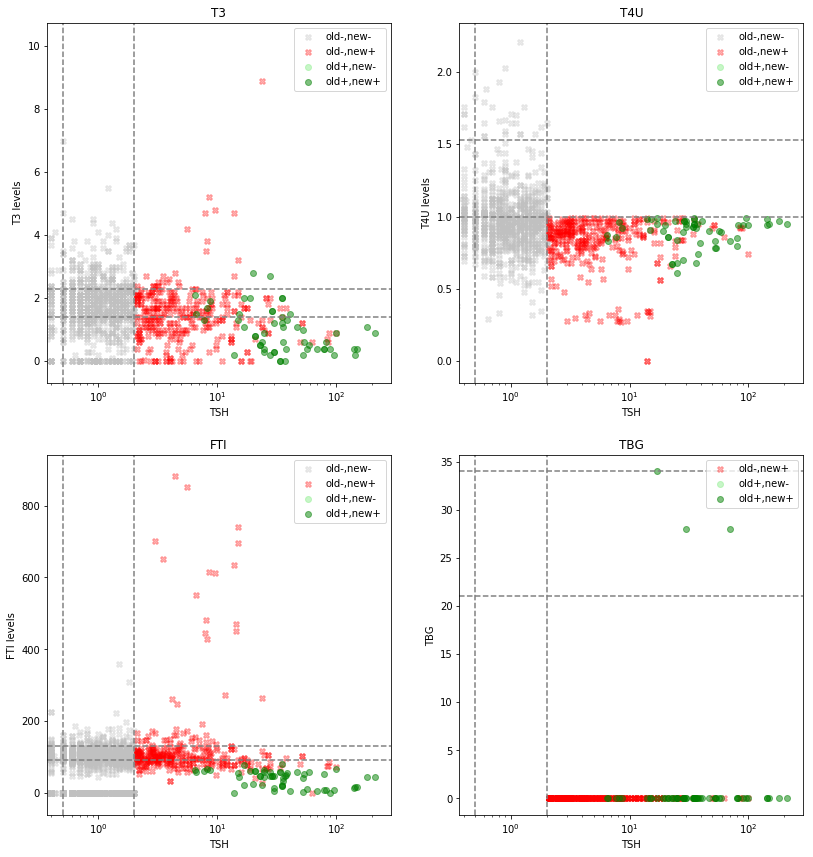

<Figure size 1440x1440 with 0 Axes>

In [21]:
x, axarr = plt.subplots(2, 2)
plt.figure(figsize=(20, 20))
label1 = 'old-,new-'
label2 = 'old-,new+'
label3 = 'old+,new-'
label4 = 'old+,new+'

lbl1_color = 'silver'
lbl2_color = 'red'
lbl3_color = 'lightgreen'
lbl4_color = 'green'

axarr[0,0].scatter(ht['TSH'].loc[(ht['hypothyroid'].isin(['negative']))&
                                 (ht['New_Hypothyroid'].isin(['f']))],
                   ht['T3'].loc[(ht['hypothyroid'].isin(['negative']))&
                                 (ht['New_Hypothyroid'].isin(['f']))],
                   c=lbl1_color, alpha=.3, label=label1, marker='X')
axarr[0,0].scatter(ht['TSH'].loc[(ht['hypothyroid'].isin(['negative']))&
                                 (ht['New_Hypothyroid'].isin(['t']))],
                   ht['T3'].loc[(ht['hypothyroid'].isin(['negative']))&
                                 (ht['New_Hypothyroid'].isin(['t']))],
                   c=lbl2_color, alpha=.3, label=label2, marker='X')
axarr[0,0].scatter(ht['TSH'].loc[(ht['hypothyroid'].isin(['hypothyroid']))&
                                 (ht['New_Hypothyroid'].isin(['f']))],
                   ht['T3'].loc[(ht['hypothyroid'].isin(['hypothyroid']))&
                                 (ht['New_Hypothyroid'].isin(['f']))],
                   c=lbl3_color, alpha=.5, label=label3)
axarr[0,0].scatter(ht['TSH'].loc[(ht['hypothyroid'].isin(['hypothyroid']))&
                                 (ht['New_Hypothyroid'].isin(['t']))],
                   ht['T3'].loc[(ht['hypothyroid'].isin(['hypothyroid']))&
                                 (ht['New_Hypothyroid'].isin(['t']))],
                   c=lbl4_color, alpha=.5, label=label4)
axarr[0,0].axhline(y=lowT3, color='gray', linestyle='--')
axarr[0,0].axhline(y=highT3, color='gray', linestyle='--')
axarr[0,0].axvline(x=lowTSH, color='gray', linestyle='--')
axarr[0,0].axvline(x=highTSH, color='gray', linestyle='--')
axarr[0,0].set_xscale('log')
#axarr[0,0].set_yscale('log')
axarr[0,0].set_xlabel('TSH')
axarr[0,0].set_ylabel('T3 levels')
axarr[0,0].legend(loc='upper right',prop={'size': 10});
axarr[0,0].set_title('T3')

axarr[0,1].scatter(ht['TSH'].loc[(ht['hypothyroid'].isin(['negative']))&
                                 (ht['New_Hypothyroid'].isin(['f']))],
                   ht['T4U'].loc[(ht['hypothyroid'].isin(['negative']))&
                                 (ht['New_Hypothyroid'].isin(['f']))],
                   c=lbl1_color, alpha=.3, label=label1, marker='X')
axarr[0,1].scatter(ht['TSH'].loc[(ht['hypothyroid'].isin(['negative']))&
                                 (ht['New_Hypothyroid'].isin(['t']))],
                   ht['T4U'].loc[(ht['hypothyroid'].isin(['negative']))&
                                 (ht['New_Hypothyroid'].isin(['t']))],
                   c=lbl2_color, alpha=.3, label=label2, marker='X')
axarr[0,1].scatter(ht['TSH'].loc[(ht['hypothyroid'].isin(['hypothyroid']))&
                                 (ht['New_Hypothyroid'].isin(['f']))],
                   ht['T4U'].loc[(ht['hypothyroid'].isin(['hypothyroid']))&
                                 (ht['New_Hypothyroid'].isin(['f']))],
                   c=lbl3_color, alpha=.5, label=label3)
axarr[0,1].scatter(ht['TSH'].loc[(ht['hypothyroid'].isin(['hypothyroid']))&
                                 (ht['New_Hypothyroid'].isin(['t']))],
                   ht['T4U'].loc[(ht['hypothyroid'].isin(['hypothyroid']))&
                                 (ht['New_Hypothyroid'].isin(['t']))],
                   c=lbl4_color, alpha=.5, label=label4)
axarr[0,1].axhline(y=lowT4U, color='gray', linestyle='--')
axarr[0,1].axhline(y=highT4U, color='gray', linestyle='--')
axarr[0,1].axvline(x=lowTSH, color='gray', linestyle='--')
axarr[0,1].axvline(x=highTSH, color='gray', linestyle='--')
axarr[0,1].set_xscale('log')
#axarr[0,1].set_yscale('log')
axarr[0,1].set_xlabel('TSH')
axarr[0,1].set_ylabel('T4U levels')
axarr[0,1].legend(loc='upper right',prop={'size': 10});
axarr[0,1].set_title('T4U')

axarr[1,0].scatter(ht['TSH'].loc[(ht['hypothyroid'].isin(['negative']))&
                                 (ht['New_Hypothyroid'].isin(['f']))],
                   ht['FTI'].loc[(ht['hypothyroid'].isin(['negative']))&
                                 (ht['New_Hypothyroid'].isin(['f']))],
                   c=lbl1_color, alpha=.3, label=label1, marker='X')
axarr[1,0].scatter(ht['TSH'].loc[(ht['hypothyroid'].isin(['negative']))&
                                 (ht['New_Hypothyroid'].isin(['t']))],
                   ht['FTI'].loc[(ht['hypothyroid'].isin(['negative']))&
                                 (ht['New_Hypothyroid'].isin(['t']))],
                   c=lbl2_color, alpha=.3, label=label2, marker='X')
axarr[1,0].scatter(ht['TSH'].loc[(ht['hypothyroid'].isin(['hypothyroid']))&
                                 (ht['New_Hypothyroid'].isin(['f']))],
                   ht['FTI'].loc[(ht['hypothyroid'].isin(['hypothyroid']))&
                                 (ht['New_Hypothyroid'].isin(['f']))],
                   c=lbl3_color, alpha=.5, label=label3)
axarr[1,0].scatter(ht['TSH'].loc[(ht['hypothyroid'].isin(['hypothyroid']))&
                                 (ht['New_Hypothyroid'].isin(['t']))],
                   ht['FTI'].loc[(ht['hypothyroid'].isin(['hypothyroid']))&
                                 (ht['New_Hypothyroid'].isin(['t']))],
                   c=lbl4_color, alpha=.5, label=label4)
axarr[1,0].axhline(y=lowFTI, color='gray', linestyle='--')
axarr[1,0].axhline(y=highFTI, color='gray', linestyle='--')
axarr[1,0].axvline(x=lowTSH, color='gray', linestyle='--')
axarr[1,0].axvline(x=highTSH, color='gray', linestyle='--')
axarr[1,0].set_xscale('log')
#axarr[1,0].set_yscale('log')
axarr[1,0].set_xlabel('TSH')
axarr[1,0].set_ylabel('FTI levels')
axarr[1,0].legend(loc='upper right',prop={'size': 10});
axarr[1,0].set_title('FTI')

axarr[1,0].scatter(ht['TSH'].loc[(ht['hypothyroid'].isin(['negative']))&
                                 (ht['New_Hypothyroid'].isin(['f']))],
                   ht['TBG'].loc[(ht['hypothyroid'].isin(['negative']))&
                                 (ht['New_Hypothyroid'].isin(['f']))],
                   c=lbl1_color, alpha=.3, label=label1, marker='X')
axarr[1,1].scatter(ht['TSH'].loc[(ht['hypothyroid'].isin(['negative']))&
                                 (ht['New_Hypothyroid'].isin(['t']))],
                   ht['TBG'].loc[(ht['hypothyroid'].isin(['negative']))&
                                 (ht['New_Hypothyroid'].isin(['t']))],
                   c=lbl2_color, alpha=.3, label=label2, marker='X')
axarr[1,1].scatter(ht['TSH'].loc[(ht['hypothyroid'].isin(['hypothyroid']))&
                                 (ht['New_Hypothyroid'].isin(['f']))],
                   ht['TBG'].loc[(ht['hypothyroid'].isin(['hypothyroid']))&
                                 (ht['New_Hypothyroid'].isin(['f']))],
                   c=lbl3_color, alpha=.5, label=label3)
axarr[1,1].scatter(ht['TSH'].loc[(ht['hypothyroid'].isin(['hypothyroid']))&
                                 (ht['New_Hypothyroid'].isin(['t']))],
                   ht['TBG'].loc[(ht['hypothyroid'].isin(['hypothyroid']))&
                                 (ht['New_Hypothyroid'].isin(['t']))],
                   c=lbl4_color, alpha=.5, label=label4)
axarr[1,1].axhline(y=lowTBG, color='gray', linestyle='--')
axarr[1,1].axhline(y=highTBG, color='gray', linestyle='--')
axarr[1,1].axvline(x=lowTSH, color='gray', linestyle='--')
axarr[1,1].axvline(x=highTSH, color='gray', linestyle='--')
axarr[1,1].set_xscale('log')
#axarr[1,1].set_yscale('log')
axarr[1,1].set_xlabel('TSH')
axarr[1,1].set_ylabel('TBG')
axarr[1,1].legend(loc='upper right',prop={'size': 10});
axarr[1,1].set_title('TBG')

x.subplots_adjust(top=1.5, right=1)

plt.show()

In [35]:
#method for calculating errors for bar graph
def ht_error_calc_2(column1, column2, c2_condition):
    
    try:
        return (
            (ht[column1].loc[(ht[column1]!=0)
                 &(ht[column2].isin([c2_condition]))].std())
            /(ht[column1].loc[(ht[column1]!=0)
                 &(ht[column2].isin([c2_condition]))].count()**.5)
               )
    except ValueError:
        print('input error')

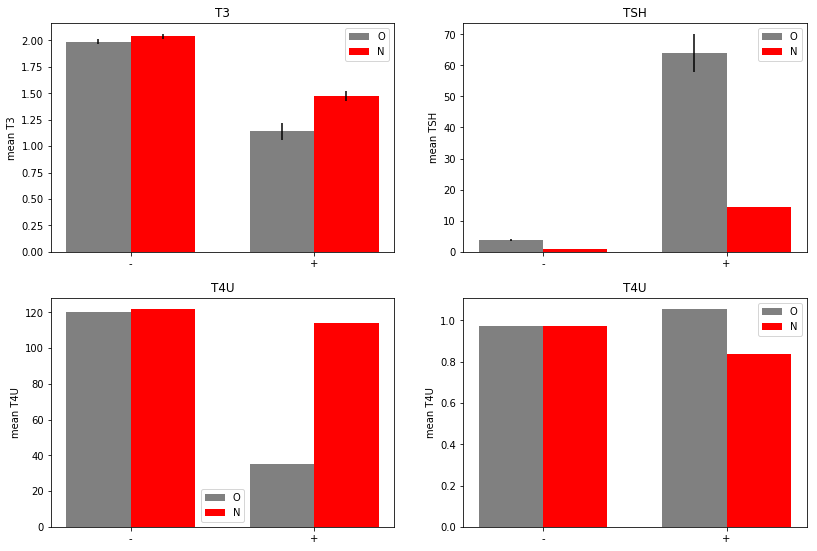

<Figure size 1440x1440 with 0 Axes>

In [38]:
x, axarr = plt.subplots(2, 2)
plt.figure(figsize=(20, 20))
ind = np.arange(2)
width = 0.35

fColor = 'gray'
mColor = 'red'

tick_values = ('-','+')
legend_values = ('O','N')

axarr[0,0].bar(ind, np.array([
    ht['T3'].loc[(ht['T3']!=0)
                 &(ht['hypothyroid'].isin(['negative']))
                ].mean(),
    ht['T3'].loc[(ht['T3']!=0)
                 &(ht['hypothyroid'].isin(['hypothyroid']))
                ].mean()
])
    , width, color=fColor, 
               yerr=(ht_error_calc_2('T3', 'hypothyroid', 'negative'), 
                     ht_error_calc_2('T3', 'hypothyroid', 'hypothyroid'))
              )
axarr[0,0].bar(ind+width, np.array([
    ht['T3'].loc[(ht['T3']!=0)
                 &(ht['New_Hypothyroid'].isin(['f']))
                ].mean(),
    ht['T3'].loc[(ht['T3']!=0)
                 &(ht['New_Hypothyroid'].isin(['t']))
                ].mean()
])
    , width, color=mColor, 
              yerr=(ht_error_calc_2('T3', 'New_Hypothyroid', 'f'), ht_error_calc_2('T3', 'New_Hypothyroid', 't'))
              )
axarr[0,0].set_title('T3')
axarr[0,0].set_ylabel('mean T3')
axarr[0,0].set_xticks(ind + width / 2)
axarr[0,0].set_xticklabels(tick_values)
axarr[0,0].legend(legend_values)

axarr[0,1].bar(ind, np.array([
    ht['TSH'].loc[(ht['TSH']!=0)
                  &(ht['hypothyroid'].isin(['negative']))
                 ].mean(),
    ht['TSH'].loc[(ht['TSH']!=0)
                  &(ht['hypothyroid'].isin(['hypothyroid']))
                 ].mean()
])
    , width, color=fColor, 
               yerr=(ht_error_calc_2('TSH', 'hypothyroid', 'negative'), ht_error_calc_2('TSH', 'hypothyroid', 'hypothyroid'))
              )
axarr[0,1].bar(ind+width, np.array([
    ht['TSH'].loc[(ht['TSH']!=0)
                  &(ht['New_Hypothyroid'].isin(['f']))
                 ].mean(),
    ht['TSH'].loc[(ht['TSH']!=0)
                  &(ht['New_Hypothyroid'].isin(['t']))
                 ].mean()
])
    , width, color=mColor, 
               yerr=(ht_error_calc_2('TSH', 'New_Hypothyroid', 'f'), ht_error_calc('TSH', 'New_Hypothyroid', 't'))
              )
axarr[0,1].set_title('TSH')
axarr[0,1].set_ylabel('mean TSH')
axarr[0,1].set_xticks(ind + width / 2)
axarr[0,1].set_xticklabels(tick_values)
axarr[0,1].legend(legend_values)

axarr[1,0].bar(ind,np.array([
    ht['FTI'].loc[(ht['FTI']!=0)
                  &(ht['hypothyroid'].isin(['negative']))
                 ].mean(),
    ht['FTI'].loc[(ht['FTI']!=0)
                  &(ht['hypothyroid'].isin(['hypothyroid']))
                 ].mean()
])
    , width, color=fColor, 
              yerr=(ht_error_calc_2('FTI', 'hypothyroid', 'negative'), ht_error_calc_2('FTI', 'hypothyroid', 'hypothyroid'))
              )
axarr[1,0].bar(ind + width,np.array([
    ht['FTI'].loc[(ht['FTI']!=0)
                  &(ht['New_Hypothyroid'].isin(['f']))
                 ].mean(),
    ht['FTI'].loc[(ht['FTI']!=0)
                  &(ht['New_Hypothyroid'].isin(['t']))
                 ].mean()
])
    , width, color=mColor, 
              yerr=(ht_error_calc_2('FTI', 'New_Hypothyroid', 'f'), ht_error_calc_2('FTI', 'New_Hypothyroid', 't'))
              )
axarr[1,0].set_title('T4U')
axarr[1,0].set_ylabel('mean T4U')
axarr[1,0].set_xticks(ind + width / 2)
axarr[1,0].set_xticklabels(tick_values)
axarr[1,0].legend(legend_values)

axarr[1,1].bar(ind, np.array([
    ht['T4U'].loc[(ht['T4U']!=0)
                  &(ht['hypothyroid'].isin(['negative']))
                 ].mean(),
    ht['T4U'].loc[(ht['T4U']!=0)
                  &(ht['hypothyroid'].isin(['hypothyroid']))
                 ].mean()
])
    , width, color=fColor, 
              yerr=(ht_error_calc_2('T4U', 'hypothyroid', 'negative'), ht_error_calc_2('T4U', 'hypothyroid', 'hypothyroid'))
                   )
axarr[1,1].bar(ind + width, np.array([
    ht['T4U'].loc[(ht['T4U']!=0)
                  &(ht['New_Hypothyroid'].isin(['f']))
                 ].mean(),
    ht['T4U'].loc[(ht['T4U']!=0)
                  &(ht['New_Hypothyroid'].isin(['t']))
                 ].mean()
])
    , width, color=mColor, 
              yerr=(ht_error_calc_2('T4U', 'New_Hypothyroid', 't'), ht_error_calc_2('T4U', 'New_Hypothyroid', 't'))
                   )
axarr[1,1].set_ylabel('mean T4U')
axarr[1,1].set_title('T4U')
axarr[1,1].set_xticks(ind + width / 2)
axarr[1,1].set_xticklabels(tick_values)
axarr[1,1].legend(legend_values)

x.subplots_adjust(top=1, right=1)

plt.show()